In [77]:
from sklearn.datasets import load_iris
import sklearn as sk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# [Problem 1] Data acquisition

In [78]:
data = load_iris()
data.target[[10, 25, 50]]

array([0, 0, 1])

In [79]:
X = pd.DataFrame(data=data.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
Y = pd.DataFrame(data=data.target, columns=["Species"])

# [Problem 2] Combining data

In [80]:
Z = pd.concat([X, Y], axis=1)
print(Z)

     sepal_length  sepal_width  petal_length  petal_width  Species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]


# [Problem 3] Checking the data

In [81]:
display(Z)
display(Z.value_counts)

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<bound method DataFrame.value_counts of      sepal_length  sepal_width  petal_length  petal_width  Species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]>

- Display the 4th sample from the beginning and see what each feature is like. (Numerical data or character data, etc.)

In [82]:
display(Z.head(4))
Z.head(4).info()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  4 non-null      float64
 1   sepal_width   4 non-null      float64
 2   petal_length  4 non-null      float64
 3   petal_width   4 non-null      float64
 4   Species       4 non-null      int32  
dtypes: float64(4), int32(1)
memory usage: 272.0 bytes


- Output the total number of samples for each label.

In [83]:
for i in range(Z["Species"].nunique()):
    print("Number of samples labeled '{}': {}".format(i, Z[Z["Species"] == i].shape[0]))

Number of samples labeled '0': 50
Number of samples labeled '1': 50
Number of samples labeled '2': 50


- Check if there is a missing value in the feature quantity.

In [84]:
Z.info()
print("All columns are of 150 non-null values.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   Species       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
All columns are of 150 non-null values.


In [85]:
Z[Z.isnull()].count()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Species         0
dtype: int64

- Display the mean, standard deviation, and quartiles of the feature values at once.

In [86]:
Z.describe()

,sepal_length,sepal_width,petal_length,petal_width,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# [Problem 4] Examining the iris dataset itself

<blockquote>
- It is a multivariate data set introduced by Ronald Fisher in 1936. <br>
- The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. <br>
- The use of this data set in cluster analysis however is not common, since the data set only contains two clusters with rather obvious separation. One of the clusters contains Iris setosa, while the other cluster contains both Iris virginica and Iris versicolor and is not separable without the species information Fisher used. This makes the data set a good example to explain the difference between supervised and unsupervised techniques in data mining: Fisher's linear discriminant model can only be obtained when the object species are known: class labels and clusters are not necessarily the same. <br>
- The iris data set is widely used as a beginner's dataset for machine learning purposes. The dataset is included in R base and Python in the machine learning package Scikit-learn, so that users can access it without having to find a source for it. <br>

# [Problem 5] Extracting the required data

- Extract $\textbf{sepal_width}$, columns in three different ways

In [87]:
Z["sepal_width"]

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [88]:
Z[Z.columns[1]]

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [89]:
Z.T.iloc[1]

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

- Extract the 50th to 99th data

In [90]:
Z.iloc[50:100]

,sepal_length,sepal_width,petal_length,petal_width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


- Extract the 50th to 99th data of the $\textbf{petal_length}$ column.

In [91]:
Z.iloc[50:100]["petal_length"]

50    4.7
51    4.5
52    4.9
53    4.0
54    4.6
55    4.5
56    4.7
57    3.3
58    4.6
59    3.9
60    3.5
61    4.2
62    4.0
63    4.7
64    3.6
65    4.4
66    4.5
67    4.1
68    4.5
69    3.9
70    4.8
71    4.0
72    4.9
73    4.7
74    4.3
75    4.4
76    4.8
77    5.0
78    4.5
79    3.5
80    3.8
81    3.7
82    3.9
83    5.1
84    4.5
85    4.5
86    4.7
87    4.4
88    4.1
89    4.0
90    4.4
91    4.6
92    4.0
93    3.3
94    4.2
95    4.2
96    4.2
97    4.3
98    3.0
99    4.1
Name: petal_length, dtype: float64

- Extract data with a $\textbf{petal_width}$ value of 0.2

In [92]:
Z[Z["petal_width"] == 0.2]

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
14,5.8,4.0,1.2,0.2,0


# [Problem 6] Creating a diagram

- Make a pie chart of the number of samples per label (while showing percentages)

<AxesSubplot:ylabel='Species'>

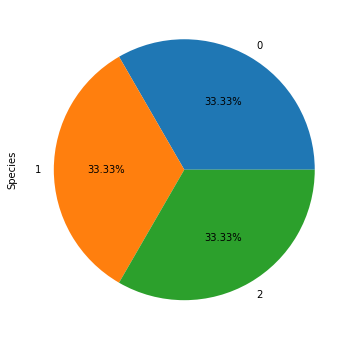

In [93]:
ex = Z["Species"].value_counts()
ex.plot.pie(autopct="%.2f%%", figsize=(6, 6))

- Select features one by one and visualize the distribution of data for each label using a box plot

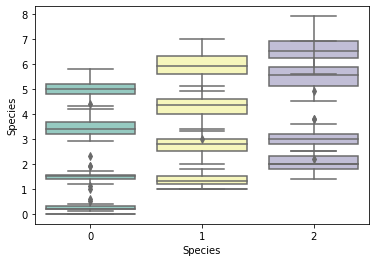

In [94]:
for col in Z.columns:
    ax = sns.boxplot(x="Species", y=col, data=Z, palette="Set3")

<AxesSubplot:xlabel='Species', ylabel='petal_width'>

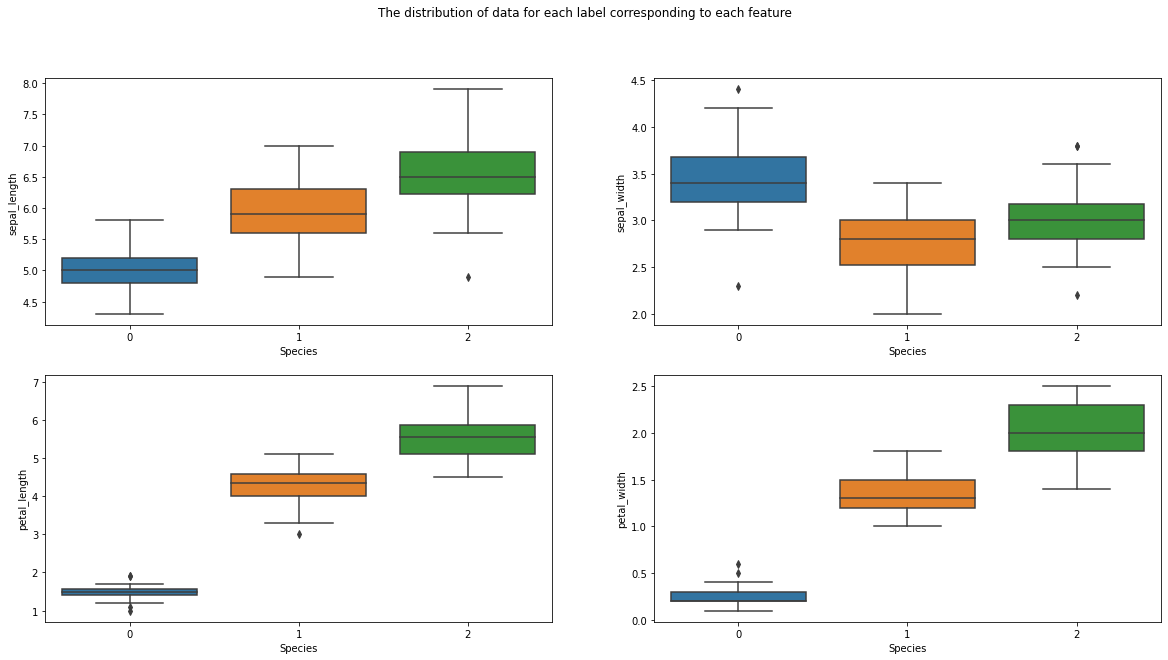

In [95]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

fig.suptitle('The distribution of data for each label corresponding to each feature')

# for i in range(4):
#     sns.boxplot(ax=axes[i], data=Z, x="Species", y=Z.columns[i])

sns.boxplot(ax=axes[0,0], data=Z, x="Species", y=Z.columns[0])
sns.boxplot(ax=axes[0,1], data=Z, x="Species", y=Z.columns[1])
sns.boxplot(ax=axes[1,0], data=Z, x="Species", y=Z.columns[2])
sns.boxplot(ax=axes[1,1], data=Z, x="Species", y=Z.columns[3])

- Select features one by one and visualize the distribution of data for each label using a violin plot


<AxesSubplot:xlabel='Species', ylabel='petal_width'>

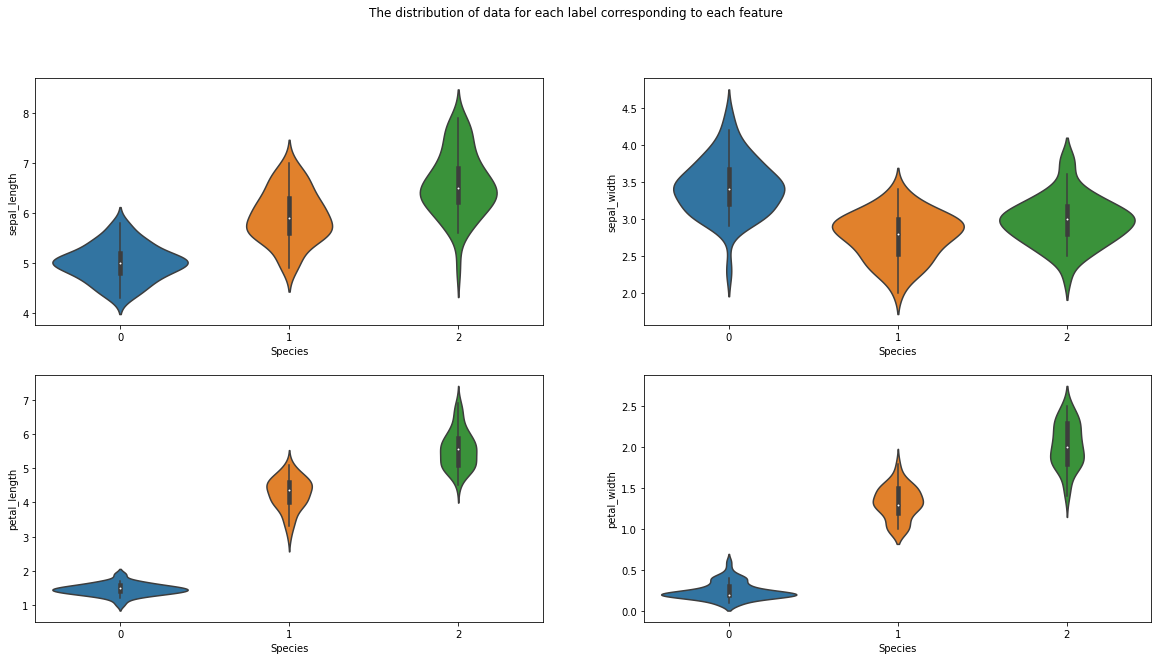

In [96]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

fig.suptitle('The distribution of data for each label corresponding to each feature')

# for i in range(4):
#     sns.boxplot(ax=axes[i], data=Z, x="Species", y=Z.columns[i])

sns.violinplot(ax=axes[0,0], data=Z, x="Species", y=Z.columns[0])
sns.violinplot(ax=axes[0,1], data=Z, x="Species", y=Z.columns[1])
sns.violinplot(ax=axes[1,0], data=Z, x="Species", y=Z.columns[2])
sns.violinplot(ax=axes[1,1], data=Z, x="Species", y=Z.columns[3])

<blockquote>Violin plot is more visually attractive because it shows a smooth distribution curve. Box plot, however, retains and better represents the discrete data.

# [Problem 7] Confirming the relationship between features

- Take one feature for each of the vertical and horizontal axes and create a color-coded scatter plot for each type (6).

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

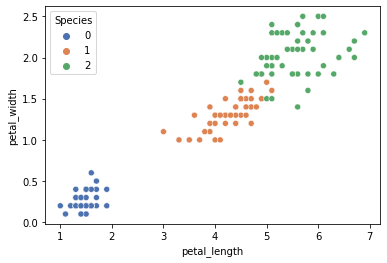

In [97]:
sns.scatterplot(data=Z, x="petal_length", y="petal_width", hue="Species", palette="deep")

- Create a scatterplot matrix that displays all combinations of scatterplots at once.

In [100]:
Z

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


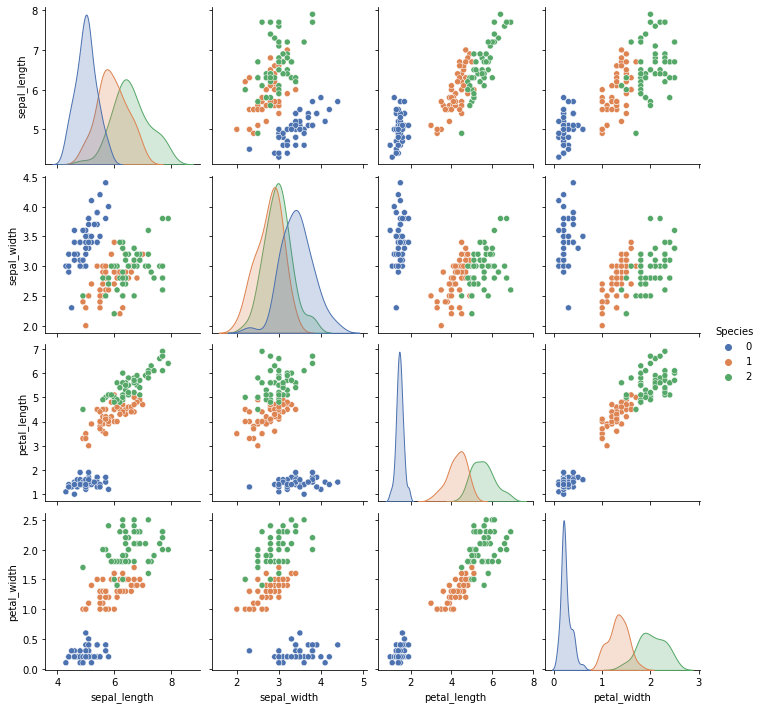

In [99]:
# sns.set_theme(style="ticks")

sns.pairplot(data=Z, hue="Species", palette="deep")

- Create a correlation coefficient matrix for 4 features

In [119]:
# display(Z.drop(columns="Species"))
# display(Z[Z.columns[0:4]])

In [117]:
cor = Z.drop(columns="Species").corr()
display(cor)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


- Make a heat map of the correlation coefficient matrix.

<AxesSubplot:>

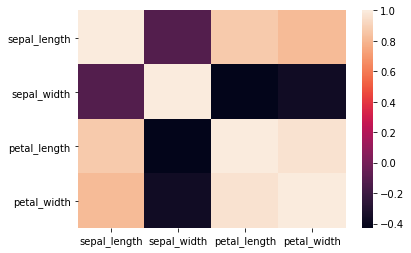

In [118]:
sns.heatmap(data=cor,)

# [Problem 8] Explaining the results of visualized graphs and tables

 <blockquote>
 - In general, irises from group 2 are larger in the size of the sepals and petals (except for the sepal width, where group 0 tend to be larger). Group 1 irsises <br>
 - Based on the heat map of correlation coefficient, sepal width and the size of petal have opposite growth tendency, while the sepal width and length are not related.